In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTAMOS LOS MAXIMOS ANUALES DE LAS ESTACIONES

In [27]:
lluvia_sl_max = pd.read_excel(r'C:\Users\lab_4\OneDrive\Escritorio\Metadata\Estaciones2.xlsx', 1, index_col=None, header=None)

In [28]:
lluvia_sl_max.columns = lluvia_sl_max.iloc[0]

In [29]:
lluvia_sl_max = lluvia_sl_max.drop([0])

In [30]:
lluvia_sl_max.set_index('Año hid', inplace = True)

In [129]:
#SEPARAMOS EN TRAIN Y TEST
lluvia_train = lluvia_sl_max['San Luis Tucuman'].iloc[:25]
lluvia_test = lluvia_sl_max['San Luis Tucuman'].iloc[26:]

In [24]:
#MODIFICAMOS LOS INDICES A DATETIME
lluvia_train.index = pd.to_datetime(lluvia_train.index, format='%Y')
lluvia_test.index = pd.to_datetime(lluvia_test.index, format='%Y')

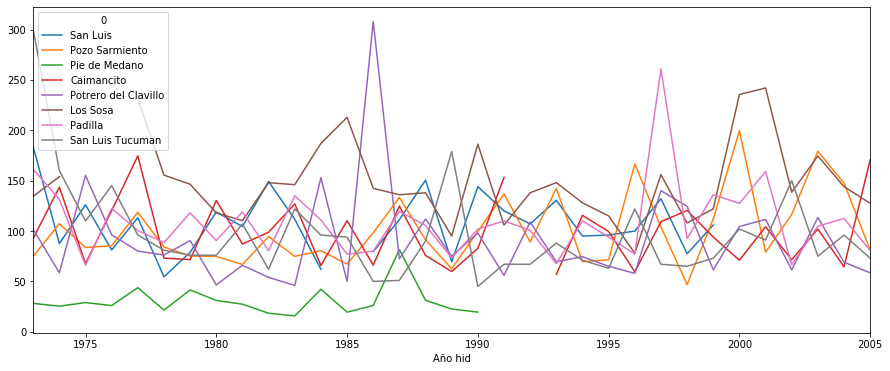

In [10]:
#PLOTEAMOS LAS SERIES PARA LAS ESTACIONES
lluvia_sl_max.plot(figsize=(15, 6))
plt.show()

In [13]:
lluvia_train = lluvia_train.resample('AS').asfreq()
lluvia_test = lluvia_test.resample('AS').asfreq()

In [14]:
lluvia_train = lluvia_train.astype('float64')
lluvia_test = lluvia_test.astype('float64')

In [ ]:
lluvia_train.dtype

In [18]:
#USAMOS CODIGO DE INTERNET, TIENE UNA PARTE PARA EVALUAR EL MODELO DE ARIMA, ES DECIR LOS PARÁMETROS,
# https://machinelearningmastery.com/make-sample-forecasts-arima-python/
# https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(lluvia_sl_max['San Luis Tucuman'].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=834.024
ARIMA(0, 0, 1) MSE=1025.072
ARIMA(0, 0, 2) MSE=1023.857
ARIMA(0, 1, 0) MSE=1610.474
ARIMA(0, 1, 1) MSE=1152.245
ARIMA(0, 1, 2) MSE=1207.083
ARIMA(0, 2, 0) MSE=5102.157
ARIMA(0, 2, 1) MSE=1978.486
ARIMA(0, 2, 2) MSE=1545.601
ARIMA(1, 0, 0) MSE=1042.602
ARIMA(1, 0, 1) MSE=864.074
ARIMA(1, 1, 0) MSE=1196.557
ARIMA(1, 1, 1) MSE=1515.201
ARIMA(1, 2, 0) MSE=2414.591
ARIMA(1, 2, 1) MSE=1599.146
ARIMA(2, 0, 0) MSE=1012.811
ARIMA(2, 0, 1) MSE=1198.858
ARIMA(2, 1, 0) MSE=1220.764
ARIMA(2, 1, 1) MSE=1458.968
ARIMA(2, 2, 0) MSE=2034.396
ARIMA(4, 0, 0) MSE=999.754
ARIMA(4, 0, 1) MSE=1111.981
ARIMA(4, 1, 0) MSE=1320.312
ARIMA(4, 1, 1) MSE=1352.586
ARIMA(4, 2, 0) MSE=1681.658
ARIMA(4, 2, 1) MSE=1568.910
ARIMA(6, 0, 0) MSE=1104.669
ARIMA(6, 0, 1) MSE=1042.468
ARIMA(6, 1, 0) MSE=1586.745
ARIMA(6, 1, 1) MSE=1705.553
ARIMA(6, 2, 0) MSE=2154.437
Best ARIMA(0, 0, 0) MSE=834.024


In [49]:
# FITEAMOS EL MODELO, QUE NOS DA QUE ES UN MODELO DE RUIDO BLANCO (0,0,0)
model = ARIMA(np.asarray(lluvia_train), order=(0,0,0))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   25
Model:                     ARMA(0, 0)   Log Likelihood                -134.627
Method:                           css   S.D. of innovations             52.781
Date:                Thu, 27 Feb 2020   AIC                            273.255
Time:                        16:12:53   BIC                            275.692
Sample:                             0   HQIC                           273.931
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.4000     10.556      9.416      0.000      78.710     120.090


In [50]:
forecast = model_fit.forecast()


In [51]:
forecast

(array([99.4]), array([52.78105721]), array([[ -4.04897119, 202.84897119]]))

In [81]:
forecast = model_fit.forecast(steps=7)[0]

In [72]:
lluvia_test_a = np.array(lluvia_test)
forecast_a = np.array(forecast[0])

In [82]:
forecast

array([99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4])

In [83]:
#COMPARAMOS LO QUE SEPARAMOS PARA TESTEAR Y LO QUE FORCASTEA, QUE COMO SE VE ES UNA RECTA CON 1 VALOR
from sklearn.metrics import mean_absolute_error
mean_absolute_error(lluvia_test, forecast)

20.314285714285713

VAMOS A HACER LO MISMO PERO USANDO UNA MEDIA PONDERADA CON LOS DATOS DE LAS OTRAS ESTACIONES

In [85]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
    distancia=2*R*math.asin(math.sqrt(a))
    return distancia

In [97]:
haversine(28.02, 64.23, 26.87,65.02)

149.80461892585996

In [120]:
lluvia_sl_max = lluvia_sl_max.fillna(0)

In [110]:
A = 1 - (1/132) - (1/415) - (1/119) - (1/356) - (1/110) - (1/66) - (1/45)

In [111]:
A

0.9323376072967965

In [126]:
lluvia_sl_max['pesado'] = (lluvia_sl_max['San Luis Tucuman'] + lluvia_sl_max['San Luis']*(1/132) + lluvia_sl_max['Pozo Sarmiento']*(1/415) + lluvia_sl_max['Pie de Medano']*(1/119) + lluvia_sl_max['Caimancito']*(1/356) + lluvia_sl_max['Potrero del Clavillo']*(1/110) + lluvia_sl_max['Los Sosa']*(1/66) + lluvia_sl_max['Padilla']*(1/45))

In [127]:
lluvia_sl_max['pesado']

Año hid
1973    308.616256
1974    167.325533
1975    114.467955
1976    149.973589
1977    104.463391
1978     87.017234
1979     82.993908
1980     81.930312
1981    113.343202
1982     68.312386
1983    129.145232
1984    103.894793
1985    100.025524
1986     57.980012
1987     58.575075
1988     97.288793
1989    183.787334
1990     52.706147
1991     73.229184
1992     73.462249
1993     93.865883
1994     77.272997
1995     68.601278
1996    126.748340
1997     77.993949
1998     70.861596
1999     79.766512
2000    110.031917
2001     99.696694
2002    154.616919
2003     81.722971
2004    101.845692
2005     77.927200
Name: pesado, dtype: float64

In [130]:
lluvia_train_p = lluvia_sl_max['pesado'].iloc[:25]
lluvia_test_p = lluvia_sl_max['pesado'].iloc[26:]

In [132]:
#MODIFICAMOS LOS INDICES A DATETIME
lluvia_train_p.index = pd.to_datetime(lluvia_train_p.index, format='%Y')
lluvia_test_p.index = pd.to_datetime(lluvia_test_p.index, format='%Y')

In [134]:
lluvia_train_p = lluvia_train_p.resample('AS').asfreq()
lluvia_test_p = lluvia_test_p.resample('AS').asfreq()

In [135]:
lluvia_train_p = lluvia_train_p.astype('float64')
lluvia_test_p = lluvia_test_p.astype('float64')

In [136]:
#USAMOS CODIGO DE INTERNET, TIENE UNA PARTE PARA EVALUAR EL MODELO DE ARIMA, ES DECIR LOS PARÁMETROS,
# https://machinelearningmastery.com/make-sample-forecasts-arima-python/
# https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(lluvia_sl_max['pesado'].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=806.502
ARIMA(0, 0, 1) MSE=985.545
ARIMA(0, 0, 2) MSE=986.499
ARIMA(0, 1, 0) MSE=1490.044
ARIMA(0, 1, 1) MSE=1104.000
ARIMA(0, 1, 2) MSE=1165.809
ARIMA(0, 2, 0) MSE=4638.002
ARIMA(0, 2, 1) MSE=1857.257
ARIMA(0, 2, 2) MSE=1505.389
ARIMA(1, 0, 0) MSE=995.578
ARIMA(1, 0, 1) MSE=837.416
ARIMA(1, 1, 0) MSE=1147.006
ARIMA(1, 1, 1) MSE=1450.440
ARIMA(1, 2, 0) MSE=2278.703
ARIMA(1, 2, 1) MSE=1549.210
ARIMA(2, 0, 0) MSE=976.810
ARIMA(2, 0, 1) MSE=1411.691
ARIMA(2, 1, 0) MSE=1178.048
ARIMA(2, 1, 1) MSE=1413.048
ARIMA(2, 2, 0) MSE=1944.944
ARIMA(4, 0, 0) MSE=962.927
ARIMA(4, 0, 1) MSE=1085.091
ARIMA(4, 1, 0) MSE=1272.852
ARIMA(4, 1, 1) MSE=1304.105
ARIMA(4, 2, 0) MSE=1588.534
ARIMA(4, 2, 1) MSE=1521.290
ARIMA(6, 0, 0) MSE=1059.820
ARIMA(6, 0, 1) MSE=905.306
ARIMA(6, 1, 0) MSE=1519.186
ARIMA(6, 1, 1) MSE=1638.709
ARIMA(6, 2, 0) MSE=2048.003
Best ARIMA(0, 0, 0) MSE=806.502


In [142]:
# FITEAMOS EL MODELO, QUE NOS DA QUE ES UN MODELO DE RUIDO BLANCO (0,0,0)
model = ARIMA(np.asarray(lluvia_train_p), order=(1,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   25
Model:                     ARMA(1, 1)   Log Likelihood                -134.532
Method:                       css-mle   S.D. of innovations             52.239
Date:                Thu, 27 Feb 2020   AIC                            277.064
Time:                        17:22:51   BIC                            281.939
Sample:                             0   HQIC                           278.416
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.7684      9.008     11.741      0.000      88.113     123.424
ar.L1.y        0.9697      0.083     11.729      0.000       0.808       1.132
ma.L1.y       -1.0000      0.064    -15.734      0.0

In [143]:
forecast = model_fit.forecast(steps=7)[0]

In [144]:
forecast

array([107.47623709, 107.42452367, 107.37437615, 107.32574714,
       107.27859063, 107.23286206, 107.18851817])

In [145]:
mean_absolute_error(lluvia_test_p, forecast)

20.784297161911404

In [148]:
import pmdarima as pm

In [164]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              seasonal=False,
                              trace=True, m=3)
    return automodel

In [165]:
automodel = arimamodel(lluvia_train_p)
automodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=263.063, BIC=267.775, Time=0.114 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=262.333, BIC=264.689, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=262.516, BIC=266.050, Time=0.048 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=261.166, BIC=264.700, Time=0.074 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=261.120, BIC=262.298, Time=0.012 seconds
Total fit time: 0.271 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -129.560
Date:                Thu, 27 Feb 2020   AIC                            261.120
Time:                        17:36:48   BIC                            262.298
Sample:                             0   HQIC                           261.433
                                 - 25                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2860.2205    662.909      4.315      0.000    1560.942    4159.499
===================================================================================
Ljung-Box (Q):                       28.53   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.20   Prob(JB):                         0.30
Heteroskedasticity (H):               0.88   Skew:                            -0.71
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
# FITEAMOS EL MODELO, QUE NOS DA QUE ES UN MODELO DE RUIDO BLANCO (0,0,0)
caca = automodel.predict(7, return_conf_int=False)

In [163]:
mean_absolute_error(lluvia_test_p, caca)

22.826251742707008